## 우리가 패스트캠퍼스의 데이터사이언티스라면
## 어떻게 패스트캠퍼스의 매출액을 높일 수 있을까?

### 나중에 추가할 이미지 및 조원소개

In [1]:
# 필요한 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 엑셀 불러오기

df = pd.read_excel(r'C:\Users\min\Desktop\데이터분석프로젝트_VER2_210329_210926.xlsx')

In [3]:
# 데이터프레임 확인

df 

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [4]:
# 결측치 확인

df.isnull().sum() 

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [5]:
# format 항목의 값의 갯수 확인

df['format'].value_counts().head() 

올인원        87402
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
Name: format, dtype: int64

<AxesSubplot:xlabel='category_title', ylabel='Count'>

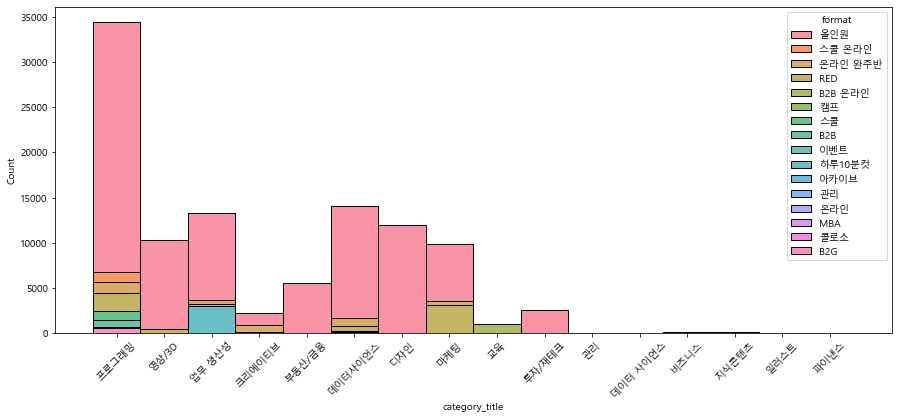

In [6]:
# 카테고리 내 강의 기획 별 개수

plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.histplot(data=df, x='category_title', hue = 'format', multiple='stack')

In [7]:
# tax_free_amount 삭제

df.pop('tax_free_amount') 

0         110500.0
1         116000.0
2         190900.0
3         190900.0
4         117500.0
            ...   
105414    116000.0
105415    189000.0
105416    116000.0
105417    189000.0
105418    169000.0
Name: tax_free_amount, Length: 105419, dtype: float64

In [8]:
# query 문을 사용하여 분석에 사용하지 않을 항목들을 삭제

df = df.query('(type != "ORDER") & (type != "TRANSACTION") & (state != "PENDING") & (state != "CANCELLED") & (state != "HIDDEN") & (state != "DELETED")')

In [9]:
# course_id 가 비어있던 특정 값들을 111111로 통일

df = df.fillna({'course_id':111111})

## 월별 분석
df_complete : 결제가 완료된 월,요일,시간대별 분석을 위한 데이터프레임

In [10]:
# 분석을 위해 새로운 데이터 프레임 생성

df_complete = df.copy()[['id','customer_id','course_id','type','state','course_title','category_title','format','transaction_amount','coupon_title','coupon_discount_amount','sale_price','completed_at']]

In [11]:
# 기존 데이터프레임의 completed_at 을 날짜/시간 형식의 포맷으로 변경

df_complete['completed_at'] = pd.to_datetime(df_complete['completed_at'], errors='coerce')

In [12]:
# 데이터 확인

df_complete

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,2021-09-25 13:39:26
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,149000,NaN,NaN,149000.0,2021-09-25 13:46:29
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,2021-09-25 14:01:26
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,2021-09-25 14:17:41


In [13]:
# '월' 기준

def month(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    elif x==3:
        return '3'
    elif x==4:
        return '4'
    elif x==5:
        return '5'
    elif x==6:
        return '6'
    elif x==7:
        return '7'
    elif x==8:
        return '8'
    elif x==9:
        return '9'
    elif x==10:
        return '10'
    elif x==11:
        return '11'   
    else:
        return '12'
df_complete['completed_at_month'] = df_complete.completed_at.dt.month.map(month)

In [14]:
# 월 별 항목들의 갯수 확인

df_complete.completed_at_month.value_counts() 

5    10067
8    10038
4     9659
6     9445
7     8919
9     6244
3     2366
Name: completed_at_month, dtype: int64

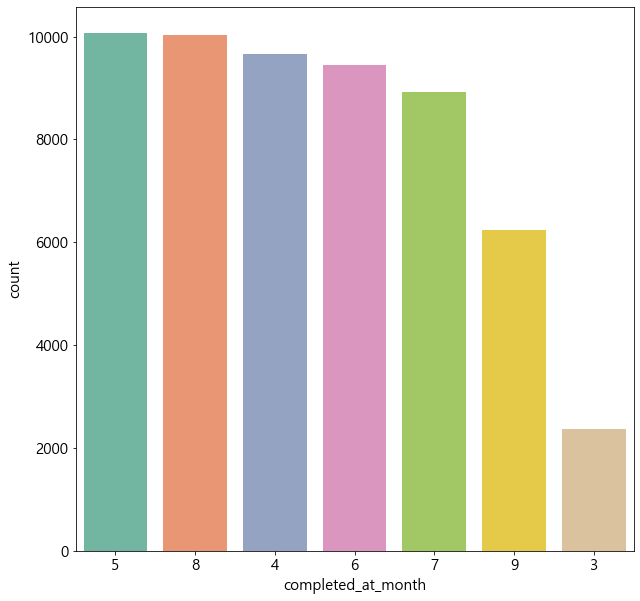

In [15]:
# 월 별 판매량의 시각화

parameters = {'xtick.labelsize':15,
             'ytick.labelsize':15,
             'axes.labelsize':15}
plt.rcParams.update(parameters)

plt.figure(figsize=(10,10))
sns.countplot(data=df_complete, x='completed_at_month', order=df_complete['completed_at_month'].value_counts().index ,palette='Set2')
plt.show()

In [16]:
# 월별 환불/결제 수

pivot_month = df_complete.pivot_table(index=['completed_at_month','type'], values='transaction_amount', aggfunc=('count'))
pivot_month

transaction_amount
completed_at_month type                       
3                  PAYMENT                2275
                   REFUND                   91
4                  PAYMENT                8980
                   REFUND                  679
5                  PAYMENT                9490
                   REFUND                  577
6                  PAYMENT                8919
                   REFUND                  526
7                  PAYMENT                8230
                   REFUND                  689
8                  PAYMENT                9270
                   REFUND                  768
9                  PAYMENT                5752
                   REFUND                  492

In [17]:
# 월별 환불/결제 비율

groupby_month = df_complete.groupby(['completed_at_month','type'])['transaction_amount'].count() / df_complete.groupby(['completed_at_month'])['transaction_amount'].count()
groupby_month

completed_at_month  type   
3                   PAYMENT    0.961538
                    REFUND     0.038462
4                   PAYMENT    0.929703
                    REFUND     0.070297
5                   PAYMENT    0.942684
                    REFUND     0.057316
6                   PAYMENT    0.944309
                    REFUND     0.055691
7                   PAYMENT    0.922749
                    REFUND     0.077251
8                   PAYMENT    0.923491
                    REFUND     0.076509
9                   PAYMENT    0.921204
                    REFUND     0.078796
Name: transaction_amount, dtype: float64

In [18]:
# 파이차트로 그려주기 위해 groupby_month에서 REFUND와 PAYMENT를 나눠서 저장

m_payment_value=[]
m_refund_value=[]
m_labels = ['3','4','5','6','7','8','9']

for idx in range(0,len(groupby_month),2):
    m_payment_value.append(groupby_month.iloc[idx])

for idx in range(1,len(groupby_month),2):
    m_refund_value.append(groupby_month.iloc[idx])
    
print(m_payment_value)
print(m_refund_value)

[0.9615384615384616, 0.9297028677916969, 0.942684017085527, 0.9443091582848068, 0.9227491871286019, 0.9234907352062164, 0.9212043561819346]
[0.038461538461538464, 0.07029713220830314, 0.05731598291447303, 0.05569084171519322, 0.07725081287139814, 0.07650926479378362, 0.07879564381806534]


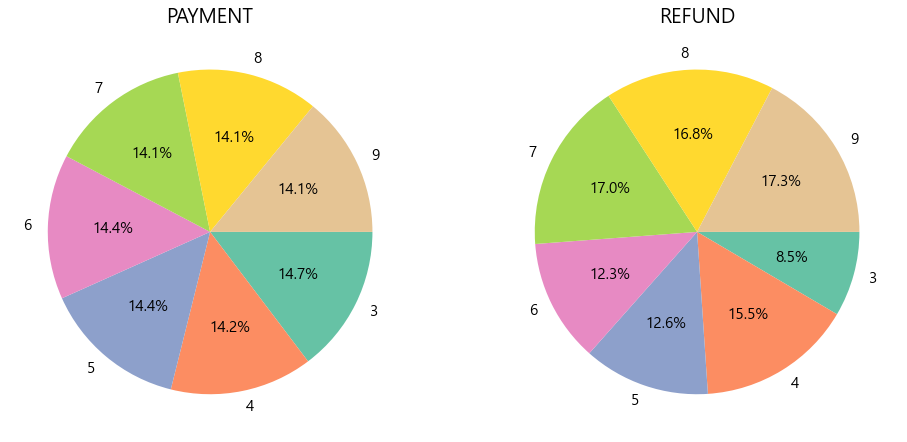

In [19]:
# 3월과 9월 모두 학기가 시작하는 달이지만, 3월은 환불 비율이 가장 낮았고 9월은 환불 비율이 가장 높았다.

colors = sns.color_palette('Set2')

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.title('PAYMENT', fontsize=20)
plt.pie(m_payment_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.subplot(1,2,2)
plt.title('REFUND', fontsize=20)
plt.pie(m_refund_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.show()

In [20]:
# 쿠폰 사용유무를 알기 위해 is_coupon 추가
def coupon(x):
    if x == True:
        return 1
    else:
        return 0
df_complete['is_coupon'] = df_complete['coupon_title'].notnull().map(coupon)
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1


In [21]:
# 월별 쿠폰사용량

pivot_m_coupon = df_complete.pivot_table(index=['completed_at_month','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_m_coupon

transaction_amount
completed_at_month is_coupon                    
3                  0                         766
                   1                        1600
4                  0                        4462
                   1                        5197
5                  0                        5645
                   1                        4422
6                  0                        7357
                   1                        2088
7                  0                        6336
                   1                        2583
8                  0                        5250
                   1                        4788
9                  0                        3159
                   1                        3085

In [22]:
# 월별 쿠폰사용비율

groupby_m_coupon = df_complete.groupby(['completed_at_month','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_month'])['transaction_amount'].count()
groupby_m_coupon

completed_at_month  is_coupon
3                   0            0.323753
                    1            0.676247
4                   0            0.461953
                    1            0.538047
5                   0            0.560743
                    1            0.439257
6                   0            0.778931
                    1            0.221069
7                   0            0.710394
                    1            0.289606
8                   0            0.523013
                    1            0.476987
9                   0            0.505926
                    1            0.494074
Name: transaction_amount, dtype: float64

In [23]:
# 사용과 미사용 쿠폰 구분

m_no_coupon_value=[]
m_use_coupon_value=[]

for idx in range(0,len(groupby_m_coupon),2):
    m_no_coupon_value.append(groupby_m_coupon.iloc[idx])

for idx in range(1,len(groupby_m_coupon),2):
    m_use_coupon_value.append(groupby_m_coupon[idx])

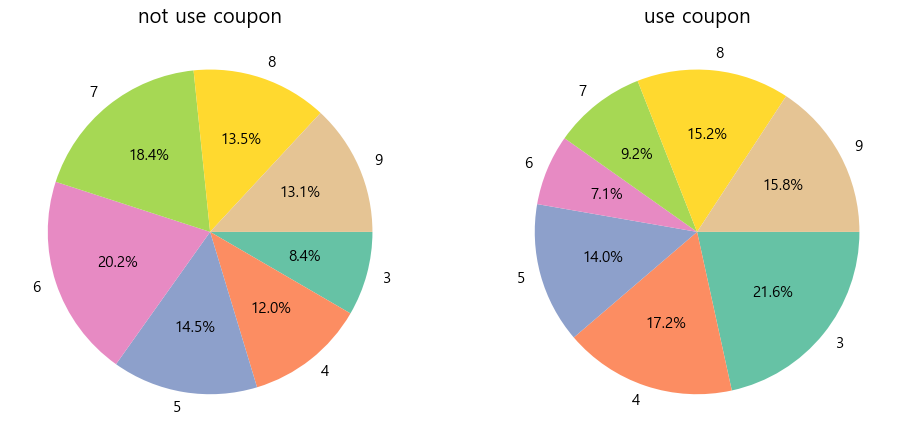

In [24]:
# 3월이 팔린 강의 수는 가장 적었지만 쿠폰으로 강의를 구매하는 비율이 가장 높다. 
# 3월부터 1학기가 끝날 때인 7월까지 점점 쿠폰 비율이 줄어들다가 여름방학인 8월부터 다시 높아진다.

plt.figure(figsize=(16,16))
plt.subplot(1,2,1)
plt.title('not use coupon', fontsize=20)
plt.pie(m_no_coupon_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.subplot(1,2,2)
plt.title('use coupon', fontsize=20)
plt.pie(m_use_coupon_value, labels=m_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':15})

plt.show()

# 요일별 분석

In [25]:
# 요일 기준

def day(x):
    if x== 0:
        return '월요일'
    elif x==1:
        return '화요일'
    elif x==2:
        return '수요일'
    elif x==3:
        return '목요일'
    elif x==4:
        return '금요일'
    elif x==5:
        return '토요일'
    elif x==6:
        return '일요일'
df_complete['completed_at_day'] = df_complete['completed_at'].dt.day_name()
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon,completed_at_day
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1,Sunday
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1,Sunday
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1,Sunday
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0,Sunday
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1,Sunday


In [26]:
# 요일별 데이터의 갯수 확인

df_complete['completed_at_day'].value_counts()

Monday       10632
Tuesday       8710
Wednesday     8705
Friday        8666
Sunday        7668
Thursday      7259
Saturday      5098
Name: completed_at_day, dtype: int64

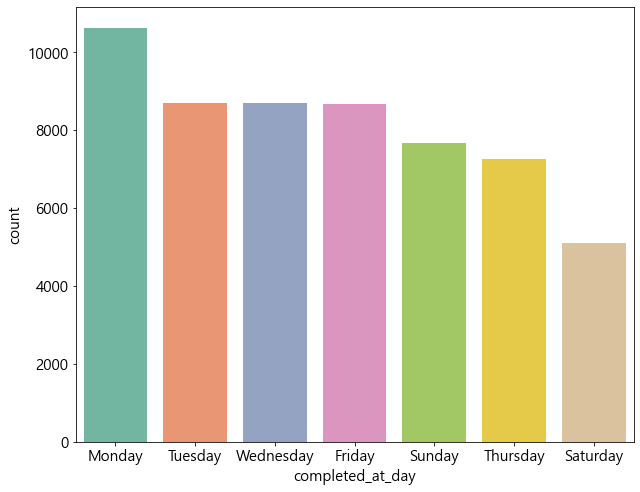

In [27]:
# 요일별 판매량의 시각화

plt.figure(figsize=(10,8))
sns.countplot(data=df_complete, x='completed_at_day', order=df_complete['completed_at_day'].value_counts().index, palette='Set2')
plt.show()

In [28]:
# 요일별 쿠폰 샤용량

pivot_d_coupon = df_complete.pivot_table(index=['completed_at_day','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_d_coupon

transaction_amount
completed_at_day is_coupon                    
Friday           0                        4605
                 1                        4061
Monday           0                        5453
                 1                        5179
Saturday         0                        3126
                 1                        1972
Sunday           0                        4555
                 1                        3113
Thursday         0                        4480
                 1                        2779
Tuesday          0                        5211
                 1                        3499
Wednesday        0                        5545
                 1                        3160

In [29]:
# 요일별 쿠폰사용 비율

groupby_d_coupon = df_complete.groupby(['completed_at_day','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_day'])['transaction_amount'].count()
groupby_d_coupon

completed_at_day  is_coupon
Friday            0            0.531387
                  1            0.468613
Monday            0            0.512886
                  1            0.487114
Saturday          0            0.613182
                  1            0.386818
Sunday            0            0.594027
                  1            0.405973
Thursday          0            0.617165
                  1            0.382835
Tuesday           0            0.598278
                  1            0.401722
Wednesday         0            0.636990
                  1            0.363010
Name: transaction_amount, dtype: float64

In [30]:
# 파이차트로 그려주기 위해 groupby_day에서 REFUND와 PAYMENT를 나눠서 저장

d_no_coupon_value=[]
d_use_coupon_value=[]
d_labels=['금요일','목요일','수요일','월요일','일요일','토요일','화요일']

for idx in range(0,len(groupby_d_coupon),2):
    d_no_coupon_value.append(groupby_d_coupon.iloc[idx])

for idx in range(1,len(groupby_d_coupon),2):
    d_use_coupon_value.append(groupby_d_coupon[idx])
    
print(d_no_coupon_value)
print(d_use_coupon_value)

[0.5313870297715209, 0.5128856282919488, 0.6131816398587682, 0.5940271257172666, 0.6171648987463838, 0.5982778415614236, 0.6369902354968409]
[0.4686129702284791, 0.48711437170805116, 0.38681836014123183, 0.40597287428273343, 0.3828351012536162, 0.40172215843857634, 0.3630097645031591]


In [31]:
# 요일별 쿠폰 사용과 미사용의 비율

d_coupon_rate = pd.DataFrame((zip(d_labels, d_no_coupon_value, d_use_coupon_value)), columns=['day','not use coupon','use coupon'])
d_coupon_rate

,day,not use coupon,use coupon
0,금요일,0.531387,0.468613
1,목요일,0.512886,0.487114
2,수요일,0.613182,0.386818
3,월요일,0.594027,0.405973
4,일요일,0.617165,0.382835
5,토요일,0.598278,0.401722
6,화요일,0.636990,0.363010


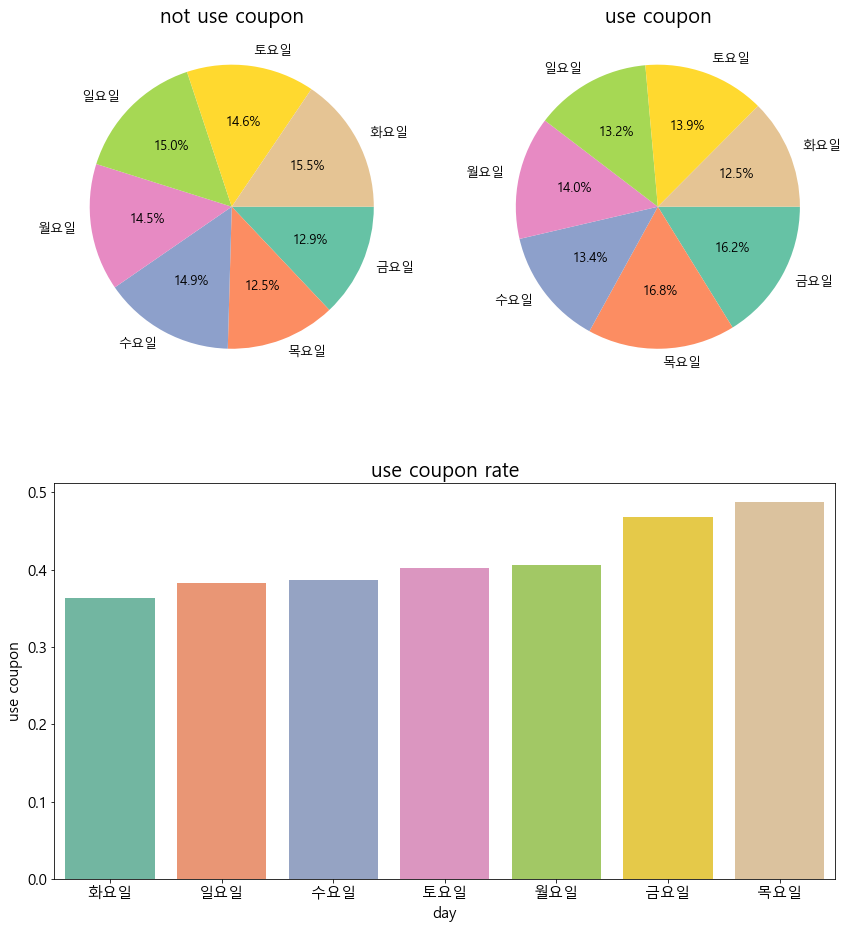

In [32]:
# 강의를 가장 많이 구매하는 월요일이 쿠폰사용비율도 가장 높다.
# 수요일은 세 번째로 많이 팔렸지만 쿠폰사용비율이 가장 낮게 나왔다. 

plt.figure(figsize=(14,16))
plt.subplot(2,2,1)
plt.title('not use coupon', fontsize=20)
plt.pie(d_no_coupon_value, labels=d_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.subplot(2,2,2)
plt.title('use coupon', fontsize=20)
plt.pie(d_use_coupon_value, labels=d_labels, autopct='%.1f%%',colors=colors, counterclock=False, textprops={'fontsize':13})

plt.subplot(2,1,2)
plt.title('use coupon rate', fontsize=20)
sns.barplot(data=d_coupon_rate, x='day', y='use coupon', palette='Set2', order=d_coupon_rate.sort_values('use coupon').day)


plt.show()

In [33]:
# 요일별 총 판매금액
# 쿠폰 사용비율이 가장 낮았던 수요일이 총 판매액은 가장 높게나왔다. -> 단순히 할인된 금액이 적어서 높게나왔는지 확인 필요.

df_complete.pivot_table(index='completed_at_day', values='transaction_amount', aggfunc='sum')

,transaction_amount
completed_at_day,
Friday,1201727995
Monday,1183770165
Saturday,744263545
Sunday,1157663115
Thursday,1130637176
Tuesday,1219665253
Wednesday,1376879908


In [34]:
# 수요일 매출량 분석
## 해당 내용은 장운님의 카테고리 하나 당 평균 가격 계산하신 결과로 대체해도 좋을 것 같습니다.

In [35]:
# format별 판매량
# 올인원 - RED - 온라인 완주반 - 기업강의(B2B + B2B온라인) 순.

df_complete.format.value_counts()

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
스쿨          1036
B2B 온라인      984
스쿨 온라인       643
B2B          485
B2G          434
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

In [36]:
# format별 판매액
# 올인원 - 기업강의(B2B+B2B 온라인) - RED순.
# 기업강의가 판매량은 4위였지만 판매액은 2위로, RED강의보다 약 4배정도 더 많은 수익을 냈다.

df_complete.pivot_table(index='format', values='transaction_amount', aggfunc='sum')

,transaction_amount
format,
B2B,752727790
B2B 온라인,1228768319
B2G,28921300
MBA,4970000
RED,481432363
관리,150000
스쿨,-1285346
스쿨 온라인,38529132
아카이브,1895700


In [37]:
# 요일별로 기업강의가 결제된 수를 보니 수요일이 월요일보다 약 2배 많은 420건으로 가장 많이 결제되었다.
# 수요일은 단순히 사람들이 쿠폰 사용률이 적어서 매출액이 높은게 아니라, 기업강의가 가장 많이 결제된 영향으로 매출액이 높음을 확인.

df_complete[(df_complete.type=='PAYMENT') & ((df_complete.format == 'B2B 온라인') | (df_complete.format == 'B2B'))]['completed_at_day'].value_counts()

Wednesday    420
Monday       242
Thursday     234
Tuesday      226
Friday       222
Sunday        15
Saturday      14
Name: completed_at_day, dtype: int64

## 시간대별 분석

In [38]:
# 시간별 기준

def hour(x):
    if x==1:
        return '1'
    elif x==2:
        return '2'
    elif x==3:
        return '3'
    elif x==4:
        return '4'
    elif x==5:
        return '5'
    elif x==6:
        return '6'
    elif x==7:
        return '7'
    elif x==8:
        return '8'
    elif x==9:
        return '9'
    elif x==10:
        return '10'
    elif x==11:
        return '11'   
    elif x==12:
        return '12'
    elif x==13:
        return '13'
    elif x==14:
        return '14'
    elif x==15:
        return '15'
    elif x==16:
        return '16'
    elif x==17:
        return '17'
    elif x==18:
        return '18'
    elif x==19:
        return '19'
    elif x==20:
        return '20'
    elif x==21:
        return '21'  
    elif x==22:
        return '22'  
    elif x==23:
        return '23'  
    else:
        return '0'
df_complete['completed_at_hour'] = df_complete.completed_at.dt.hour.map(hour)
df_complete.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,transaction_amount,coupon_title,coupon_discount_amount,sale_price,completed_at,completed_at_month,is_coupon,completed_at_day,completed_at_hour
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,2021-03-28 15:21:43,3,1,Sunday,15
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,2021-03-28 15:21:54,3,1,Sunday,15
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,2021-03-28 15:26:47,3,1,Sunday,15
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,263000,NaN,NaN,263000.0,2021-03-28 15:27:17,3,0,Sunday,15
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,2021-03-28 15:31:01,3,1,Sunday,15


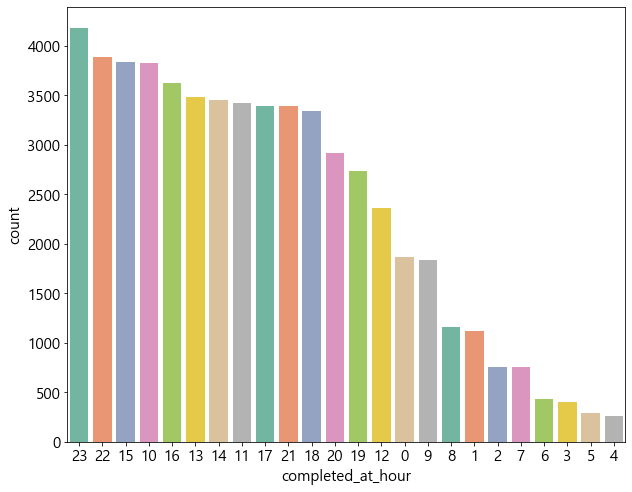

In [39]:
# 23시에 강의가 가장 많이 팔렸으며 새벽시간대에는 비교적 결제가 적었다.

plt.figure(figsize=(10,8))
sns.countplot(data=df_complete, x='completed_at_hour', order=df_complete['completed_at_hour'].value_counts().index, palette='Set2')
plt.show()

In [40]:
# 시간대별 쿠폰사용 양

pivot_h_coupon = df_complete.pivot_table(index=['completed_at_hour','is_coupon'], values='transaction_amount', aggfunc=('count'))
pivot_h_coupon

transaction_amount
completed_at_hour is_coupon                    
0                 0                        1007
                  1                         855
1                 0                         608
                  1                         509
10                0                        2326
                  1                        1495
11                0                        2203
                  1                        1222
12                0                        1319
                  1                        1044
13                0                        2164
                  1                        1322
14                0                        2138
                  1                        1314
15                0                        2404
                  1                        1434
16                0                        2191
                  1                        1436
17                0                        2041
                  1                        1351
18                0                        1988
                  1                        1358
19                0                        1541
                  1                        1193
2                 0                         458
                  1                         301
20                0                        1615
                  1                        1297
21                0                        1744
                  1                        1647
22                0                        2079
                  1                        1811
23                0                        2179
                  1                        2004
3                 0                         242
                  1                         163
4                 0                         153
                  1                         109
5                 0                         168
                  1                         119
6                 0                         267
                  1                         166
7                 0                         438
                  1                         316
8                 0                         644
                  1                         515
9                 0                        1058
                  1                         782

In [41]:
# 시간대별 쿠폰사용비율

groupby_h_coupon = df_complete.groupby(['completed_at_hour','is_coupon'])['transaction_amount'].count()/df_complete.groupby(['completed_at_hour'])['transaction_amount'].count()
groupby_h_coupon

completed_at_hour  is_coupon
0                  0            0.540816
                   1            0.459184
1                  0            0.544315
                   1            0.455685
10                 0            0.608741
                   1            0.391259
11                 0            0.643212
                   1            0.356788
12                 0            0.558189
                   1            0.441811
13                 0            0.620769
                   1            0.379231
14                 0            0.619351
                   1            0.380649
15                 0            0.626368
                   1            0.373632
16                 0            0.604081
                   1            0.395919
17                 0            0.601710
                   1            0.398290
18                 0            0.594142
                   1            0.405858
19                 0            0.563643
                   1        

In [42]:
# 파이차트로 그려주기 위해 groupby_hour에서 REFUND와 PAYMENT를 나눠서 저장

h_no_coupon_value=[]
h_use_coupon_value=[]
h_labels=['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','3','4','5','6','7','8','9']

for idx in range(0,len(groupby_h_coupon),2):
    h_no_coupon_value.append(groupby_h_coupon.iloc[idx])

for idx in range(1,len(groupby_h_coupon),2):
    h_use_coupon_value.append(groupby_h_coupon[idx])
    
print(h_no_coupon_value)
print(h_use_coupon_value)

[0.5408163265306123, 0.5443151298119964, 0.6087411672337084, 0.6432116788321168, 0.5581887431231486, 0.6207687894434882, 0.619351100811124, 0.6263678999478896, 0.6040805073063138, 0.6017099056603774, 0.5941422594142259, 0.563643013899049, 0.6034255599472991, 0.5546016483516484, 0.5143025656148629, 0.5344473007712083, 0.5209180014343773, 0.5975308641975309, 0.583969465648855, 0.5853658536585366, 0.6166281755196305, 0.5809018567639257, 0.5556514236410699, 0.575]
[0.45918367346938777, 0.4556848701880036, 0.39125883276629153, 0.3567883211678832, 0.44181125687685147, 0.37923121055651177, 0.380648899188876, 0.37363210005211045, 0.39591949269368626, 0.39829009433962265, 0.40585774058577406, 0.43635698610095097, 0.3965744400527009, 0.4453983516483517, 0.48569743438513713, 0.4655526992287918, 0.4790819985656228, 0.4024691358024691, 0.41603053435114506, 0.4146341463414634, 0.3833718244803695, 0.41909814323607425, 0.4443485763589301, 0.425]


In [43]:
# 시간별 사용한 쿠폰과 사용하지 않은 쿠폰 비율 확인

h_coupon_rate = pd.DataFrame((zip(h_labels, h_no_coupon_value, h_use_coupon_value)), columns=['hour','not use coupon','use coupon'])
h_coupon_rate

,hour,not use coupon,use coupon
0,0,0.540816,0.459184
1,1,0.544315,0.455685
2,10,0.608741,0.391259
3,11,0.643212,0.356788
4,12,0.558189,0.441811
5,13,0.620769,0.379231
6,14,0.619351,0.380649
7,15,0.626368,0.373632
8,16,0.604081,0.395919
9,17,0.601710,0.398290


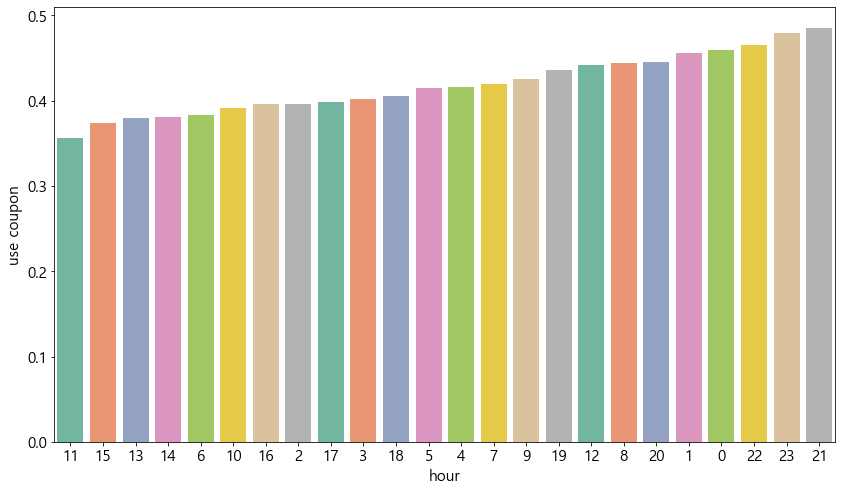

In [44]:
## 각 시간마다 비율의 차이가 크지 않아서 넣어야할지 약간 애매한 내용..

# 비교적 늦은 저녁시간(20시~1시)에 쿠폰사용량이 많았다.

plt.figure(figsize=(14,8))
sns.barplot(data=h_coupon_rate, x='hour', y='use coupon', palette='Set2',order=h_coupon_rate.sort_values('use coupon').hour)
plt.show()

In [45]:
# 시간대별 판매금액의 총액

df2 = df_complete.pivot_table(index='completed_at_hour', values='transaction_amount', aggfunc='sum')
df2

,transaction_amount
completed_at_hour,
0,241871073
1,139545550
10,297892385
11,320754241
12,371238878
13,366239490
14,618952145
15,953598041
16,568903970


<AxesSubplot:xlabel='completed_at_hour'>

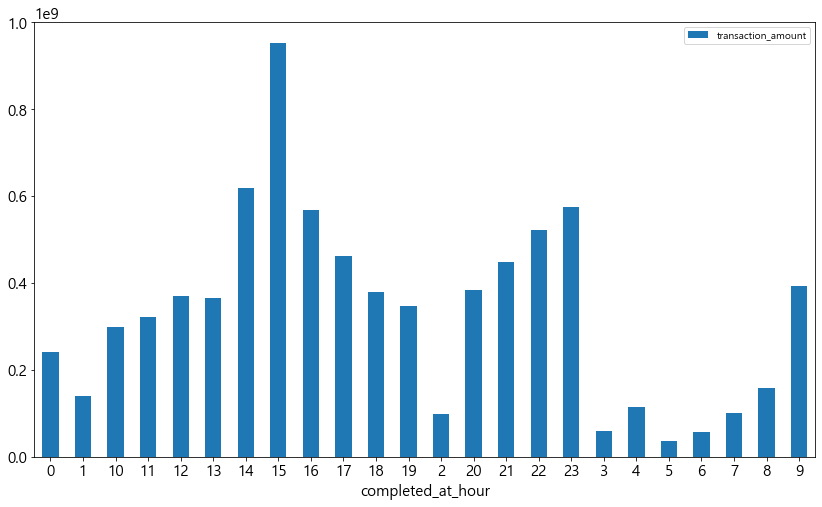

In [46]:
# 판매량이 가장 많았던 23시 보다 15시가 약 4억원만큼 높은 판매액을 보였다.
# 15시에서 쿠폰 사용율이 매우 적었는데, 판매액과 관계가 있는지 확인 필요.

df2.plot(kind='bar', figsize=(14,8), sort_columns=True, rot=0)

In [47]:
# 15시일 때 기업강의 결제수가 다른 시간대에 비해 훨씬 높다.
# 따라서 15시는 판매가격이 높은 기업강의가 많이 결제되어 판매액이 가장 높게 나왔음을 유추해볼 수 있고
# 마찬가지로 23시에는 총 판매수는 가장 많았지만 기업강의 결제수가 16으로 적어 비교적 판매액이 낮게 나왔음을 유추할 수 있다.

df_complete[(df_complete.type=='PAYMENT') & ((df_complete.format == 'B2B 온라인') | (df_complete.format == 'B2B'))]['completed_at_hour'].value_counts()

15    401
16    131
14    129
17    103
11    101
13     98
10     74
12     58
9      46
18     44
19     39
22     29
20     28
21     25
23     16
1      11
0      10
8       9
7       5
2       5
5       4
4       3
6       2
3       2
Name: completed_at_hour, dtype: int64

# 카테고리별

In [48]:
# 카테고리별 분석을 위한 새로운 데이터프레임 생성

df_copy = df.copy()

In [49]:
# 올인원 

df_all = df_copy[df_copy['format']=='올인원']

In [50]:
# 프로그래밍

df_pro = df_copy[df_copy['category_title'] == '프로그래밍']

<AxesSubplot:xlabel='subcategory_title', ylabel='count'>

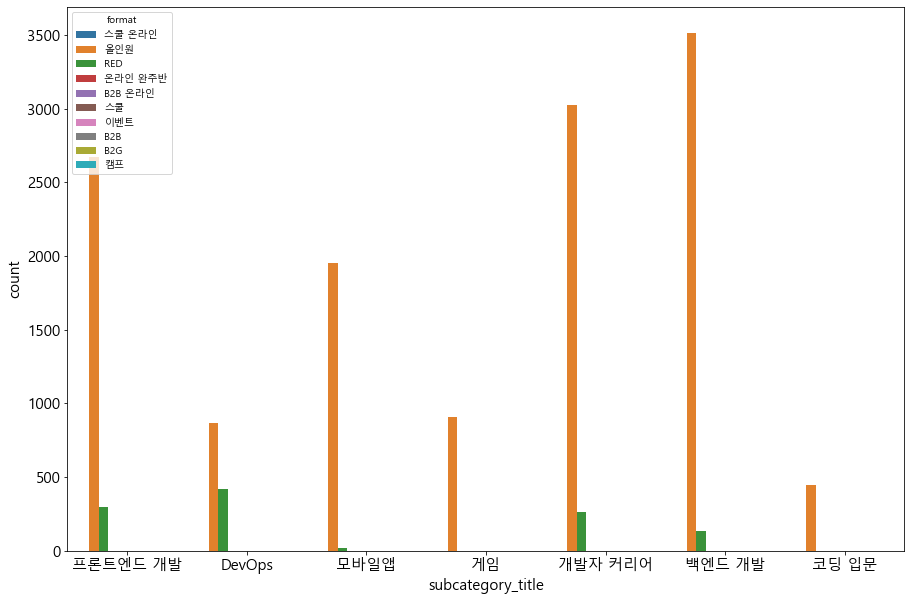

In [51]:
# 프로그래밍 강의 내 subcategory 시각화

plt.figure(figsize=(15,10))
sns.countplot(data=df_pro, x='subcategory_title', hue = 'format')

In [52]:
# 기존 데이터프레임의 marketing_start_at 을 날짜/시간 형식의 포맷으로 변경

df_copy['marketing_start_at'] = pd.to_datetime(df_copy['marketing_start_at'])

In [53]:
# 기존 데이터프레임의 completed_at 을 날짜/시간 형식의 포맷으로 변경

df_copy['completed_at'] = pd.to_datetime(df_copy['completed_at'])

In [54]:
# 환불된 값들의 갯수 확인

df_copy['type'].value_counts()

PAYMENT    52916
REFUND      3822
Name: type, dtype: int64

In [55]:
# 환불 항목만 따로 추출

df_refund = df_copy[df_copy['type']=='REFUND']

<AxesSubplot:xlabel='category_title', ylabel='count'>

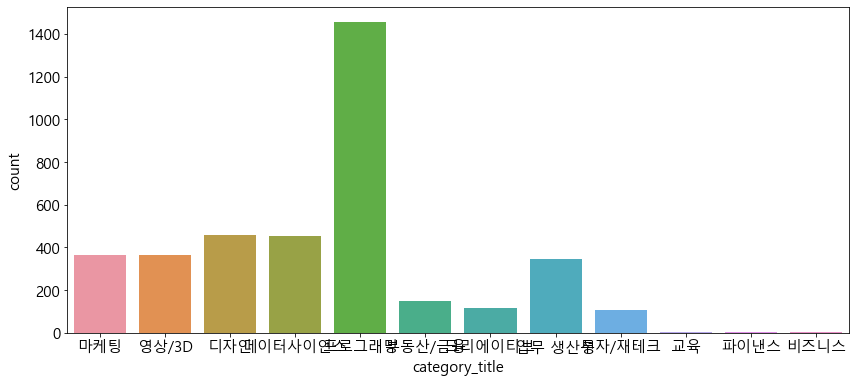

In [56]:
# 카테고리 별 환불 개수 시각화

plt.figure(figsize=(14,6))
sns.countplot(data=df_refund, x='category_title')

In [57]:
# 카테고리별 갯수 확인

df_refund.groupby('category_title').size().sort_values(ascending=False)

category_title
프로그래밍      1455
디자인         459
데이터사이언스     453
영상/3D       366
마케팅         365
업무 생산성      345
부동산/금융      148
크리에이티브      114
투자/재테크      107
교육            5
파이낸스          2
비즈니스          2
dtype: int64

### 환불을 세부적으로 확인

In [58]:
# 환불된 항목에서 특정 컬럼들을 뽑아 확인

df_refund.groupby(['type', 'category_title','subcategory_title', 'format']).count().sort_values(by = 'id', ascending = False)

id  customer_id  course_id  \
type   category_title subcategory_title format                                
REFUND 프로그래밍          백엔드 개발            올인원     256          256        256   
       영상/3D          영상 편집             올인원     233          233        233   
       프로그래밍          프론트엔드 개발          올인원     219          219        219   
                      개발자 커리어           올인원     180          180        180   
                      모바일앱              올인원     164          164        164   
       디자인            일러스트              올인원     153          153        153   
                      디자인툴              올인원     133          133        133   
       데이터사이언스        데이터분석             올인원     124          124        124   
       업무 생산성         PPT/보고서           올인원     123          123        123   
       디자인            UX/UI             올인원     112          112        112   
       데이터사이언스        딥러닝/인공지능          올인원     111          111        111   
       업무 생산성         엑셀/VBA            올인원     104          104        104   
       투자/재테크         주식 투자             올인원      88           88         88   
       마케팅            데이터마케팅            올인원      78           78         78   
                      글쓰기/카피라이팅         RED      76           76         76   
       영상/3D          모션그래픽             올인원      71           71         71   
       데이터사이언스        머신러닝              올인원      70           70         70   
       디자인            시각디자인             올인원      58           58         58   
       마케팅            디지털마케팅            올인원      54           54         54   
       부동산/금융         금융/투자 실무          올인원      53           53         53   
       마케팅            SNS마케팅            올인원      51           51         51   
       프로그래밍          게임                올인원      51           51         51   
                      DevOps            올인원      47           47         47   
       부동산/금융         회계/재무/세무          올인원      44           44         44   
                      부동산 개발            올인원      42           42         42   
       프로그래밍          코딩 입문             올인원      30           30         30   
                      DevOps            RED      29           29         29   
       업무 생산성         업무자동화             올인원      27           27         27   
       영상/3D          게임 그래픽            올인원      23           23         23   
                      VFX               올인원      23           23         23   
       마케팅            글쓰기/카피라이팅         올인원      22           22         22   
       투자/재테크         부동산 투자            올인원      19           19         19   
       프로그래밍          프론트엔드 개발          RED      14           14         14   
       데이터사이언스        딥러닝/인공지능          RED      11           11         11   
       영상/3D          영상 편집             RED      10           10         10   
       업무 생산성         리더십               올인원       9            9          9   
       데이터사이언스        데이터엔지니어링          RED       8            8          8   
       업무 생산성         커뮤니케이션            올인원       6            6          6   
       영상/3D          VFX               RED       5            5          5   
       프로그래밍          개발자 커리어           RED       5            5          5   
                      백엔드 개발            RED       5            5          5   
       데이터사이언스        데이터엔지니어링          올인원       4            4          4   
       업무 생산성         리더십               RED       3            3          3   
       데이터사이언스        데이터분석             캠프        3            3          3   
       프로그래밍          모바일앱              RED       1            1          1   
       데이터사이언스        데이터분석             RED       1            1          1   

                                                state  course_title  \
type   category_title subcategory_title format                        
REFUND 프로그래밍          백엔드 개발            올인원       256           256   
       영상/3D          영상 편집             올인원


### 개인 확인 ( '올인원', 'RED', '온라인 완주반', '하루10분컷', '이벤트', '아카이브', '캠프', 'MBA', '관리', '온라인')

In [59]:
# format 컬럼에서 필요한 값들을 추출해 새로운 데이터프레임 생성

df_per = df_copy[df_copy['format'].isin(['올인원', 'RED', '온라인 완주반', '하루10분컷', '이벤트', '아카이브', '캠프', 'MBA', '관리', '온라인'])]
df_per

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,NaN,NaN,263000.0,NaN,CARD,NaN,2020-11-27
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,NaN,CARD,프론트엔드 개발,2021-02-02
18,970682,478031.0,111111.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000,NaN,NaN,299000.0,NaN,CARD,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15


In [60]:
# 필요없는 값 제외

df_per = df_per.iloc[:,:10]
df_per.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500
8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000
10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000
14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000
18,970682,478031.0,111111.0,PAYMENT,COMPLETED,프로모션 : 기초부터 시작하는 데이터분석 한끝세트 (3월 프리패스),데이터사이언스,올인원,2021-03-28 15:33:28,299000


In [61]:
# state 의 갯수 확인

df_per['state'].value_counts()

COMPLETED    53141
REQUESTED       14
Name: state, dtype: int64

In [62]:
# tpye 별 갯수 확인

df_per['type'].value_counts()

PAYMENT    49565
REFUND      3590
Name: type, dtype: int64

In [63]:
# format 과 transaction_amount 를 그룹화하여 새로운 데이터프레임 생성

df_group = df_per.groupby('format')['transaction_amount'].sum().sort_values(ascending=False)

In [64]:
# format 별 결제 총 값

df_tra = pd.DataFrame(df_group)
df_tra

,transaction_amount
format,
올인원,5000345033
RED,481432363
온라인 완주반,417656060
하루10분컷,26726306
캠프,19071500
MBA,4970000
이벤트,4398000
아카이브,1895700
관리,150000


In [65]:
# format별 매출액
# 올인원이 84%로 가장 많은 것을 알 수 있음

5000345033 / 5956445962

0.8394846633211175

In [66]:
# format 의 갯수 확인

df_1 = df_per['format'].value_counts()
df_1

올인원        46554
RED         3383
온라인 완주반     1673
하루10분컷      1371
이벤트           89
아카이브          35
캠프            25
MBA           23
관리             1
온라인            1
Name: format, dtype: int64

In [67]:
# 총 매출액 / 팔린 강의 수 

pd.options.display.float_format = '{:.0f}'.format
df_mean = pd.DataFrame((df_group / df_1).sort_values(ascending=False))
df_mean

,0
캠프,762860
온라인 완주반,249645
MBA,216087
관리,150000
RED,142309
올인원,107410
아카이브,54163
이벤트,49416
하루10분컷,19494
온라인,-199000


### 기업 확인 ( 'B2B', 'B2B 온라인')


In [68]:
# B2B, B2B 온라인 데이터프레임 생성

df_b2b = df_copy[df_copy['format'].isin(['B2B', 'B2B 온라인'])]
df_b2b.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
631,972364,478743,204039,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000,NaN,nan,nan,NaN,TRANSFER,NaN,NaT
633,972365,478745,203352,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000,NaN,nan,nan,NaN,TRANSFER,NaN,NaT
1035,973331,479082,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000,NaN,nan,600000,NaN,CARD,NaN,NaT
1046,973363,474327,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000,NaN,nan,600000,NaN,CARD,NaN,NaT
1135,973592,479185,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000,NaN,nan,600000,NaN,CARD,NaN,NaT


In [69]:
# 기업 결제 총 금액 (19억)

df_b2b['transaction_amount'].sum()

1981496109

In [70]:
# 데이터 확인

df_b2b = df_b2b.iloc[:,:10]
df_b2b

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
631,972364,478743,204039,PAYMENT,COMPLETED,(B2B) 힐코코리아 온라인 구독 올 플랜 - 패파입주사,교육,B2B 온라인,2021-03-29 08:52:36,100000
633,972365,478745,203352,PAYMENT,COMPLETED,(B2B) 주식회사 루나 온라인 구독 ALL PLAN - 패파입주사,교육,B2B 온라인,2021-03-29 08:57:12,750000
1035,973331,479082,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:01:32,600000
1046,973363,474327,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 13:08:38,600000
1135,973592,479185,204387,PAYMENT,COMPLETED,(B2B) 현대백화점 온라인 구독 올 플랜,교육,B2B 온라인,2021-03-29 14:13:27,600000
...,...,...,...,...,...,...,...,...,...,...
104831,1361297,669386,207667,PAYMENT,COMPLETED,(B2B) 건강한선택권 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,390000
104832,1361312,669400,207555,PAYMENT,COMPLETED,(B2B) 케리케이온 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 15:04:56,1200000
104905,1367252,672301,207714,PAYMENT,COMPLETED,(B2B) (주)공정씨컴퍼니 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-23 17:33:18,2000000
105163,1367258,672307,207731,PAYMENT,COMPLETED,(B2B) 그린오션스 온라인 구독 올 플랜 - 비대면바우처,교육,B2B 온라인,2021-09-24 14:26:08,600000


In [71]:
# state 의 갯수 확인

df_b2b['state'].value_counts()

COMPLETED    1469
Name: state, dtype: int64

<AxesSubplot:xlabel='category_title', ylabel='count'>

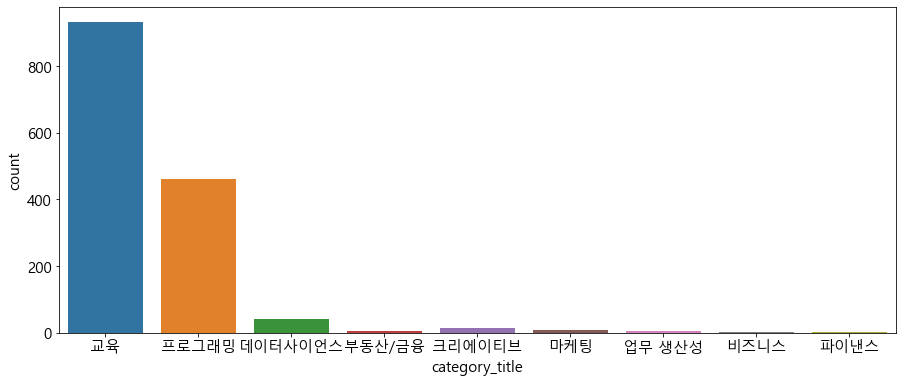

In [72]:
# 시각화

plt.figure(figsize=(15, 6))
sns.countplot(data=df_b2b, x='category_title')

In [73]:
# 카테고리별 평균 값

pd.options.display.float_format = '{:.2f}'.format
df_b2b.groupby('category_title')['transaction_amount'].mean().sort_values(ascending=False)

category_title
마케팅       14109166.67
데이터사이언스   13546988.85
크리에이티브     4204900.00
업무 생산성     3750916.67
교육         1244984.49
파이낸스        480000.00
부동산/금융      435500.00
비즈니스        360000.00
프로그래밍       138504.37
Name: transaction_amount, dtype: float64

In [74]:
# df_b2b['transaction_amount'].value_counts().sort_values(ascending=False)
# pd.options.display.float_format = '{:.2f}'.format # 소수 둘째짜리까지 표시

df_b2b['transaction_amount'][df_b2b['category_title']=='마케팅'].describe()

count           9.00
mean     14109166.67
std      37338897.03
min        360000.00
25%        480000.00
50%        480000.00
75%       1822500.00
max     113400000.00
Name: transaction_amount, dtype: float64

In [75]:
df_b2b['transaction_amount'][df_b2b['category_title']=='데이터사이언스'].describe()

count         40.00
mean    13546988.85
std     17825923.19
min       120000.00
25%      1619062.50
50%      8700000.00
75%     15373500.00
max     81040000.00
Name: transaction_amount, dtype: float64

In [76]:
df_b2b['transaction_amount'][df_b2b['category_title']=='교육'].describe()

count        932.00
mean     1244984.49
std      1920268.35
min      -600000.00
25%       600000.00
50%       600000.00
75%      1800000.00
max     19953975.00
Name: transaction_amount, dtype: float64

In [77]:
df_b2b['transaction_amount'][df_b2b['category_title']=='크리에이티브'].describe()

count         15.00
mean     4204900.00
std     11273986.12
min      -480000.00
25%       480000.00
50%       480000.00
75%      2535000.00
max     44600000.00
Name: transaction_amount, dtype: float64

In [78]:
df_b2b['transaction_amount'][df_b2b['category_title']=='프로그래밍'].describe()

count        460.00
mean      138504.37
std      1214179.23
min     -1800000.00
25%        20000.00
50%        30000.00
75%        40000.00
max     19503000.00
Name: transaction_amount, dtype: float64

In [79]:
# 정부사업 확인 (B2G)

df_b2g = df_copy[df_copy['format'].isin(['B2G'])]
df_b2g.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
76521,1228790,467567.00,205419.00,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290,NaN,nan,859290.00,INICIS,CARD,NaN,NaT
84609,1267969,623766.00,206746.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 07:36:20,20000,NaN,nan,20000.00,KAKAO,CARD,NaN,NaT
84683,1268320,623766.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 11:58:30,30000,NaN,nan,30000.00,KAKAO,CARD,NaN,NaT
84732,1268687,622246.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000,NaN,nan,30000.00,INICIS,CARD,NaN,NaT
84781,1268954,624318.00,206843.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-08-06 17:04:22,40000,NaN,nan,40000.00,INICIS,CARD,NaN,NaT


In [80]:
# info

df_b2g.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434 entries, 76521 to 105405
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      434 non-null    int64         
 1   customer_id             434 non-null    float64       
 2   course_id               434 non-null    float64       
 3   type                    434 non-null    object        
 4   state                   434 non-null    object        
 5   course_title            434 non-null    object        
 6   category_title          434 non-null    object        
 7   format                  434 non-null    object        
 8   completed_at            434 non-null    datetime64[ns]
 9   transaction_amount      434 non-null    int64         
 10  coupon_title            38 non-null     object        
 11  coupon_discount_amount  38 non-null     float64       
 12  sale_price              433 non-null    flo

In [81]:
# 데이터 확인

df_b2g = df_b2g.iloc[:,:10]
df_b2g.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount
76521,1228790,467567.00,205419.00,PAYMENT,COMPLETED,(B2B) K-Digital Training 핀테크 서비스 프론트엔드 개발 과정 1기,프로그래밍,B2G,2021-07-20 12:32:15,859290
84609,1267969,623766.00,206746.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 프로그래밍 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 07:36:20,20000
84683,1268320,623766.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 11:58:30,30000
84732,1268687,622246.00,206847.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit 빅데이터 분석 첫걸음 시작하기_4기,프로그래밍,B2G,2021-08-06 15:01:04,30000
84781,1268954,624318.00,206843.00,PAYMENT,COMPLETED,(B2B) K-Digital Credit Java & SpringBoot로 시작하는...,프로그래밍,B2G,2021-08-06 17:04:22,40000


In [82]:
# category_title 갯수 확인

df_b2g['category_title'].value_counts()

프로그래밍    433
마케팅        1
Name: category_title, dtype: int64

In [83]:
# category 별 평균값 확인

df_b2g['transaction_amount'][df_b2g['category_title']=='프로그래밍'].describe()

count       433.00
mean      20603.46
std       55301.35
min     -130000.00
25%           0.00
50%       30000.00
75%       30000.00
max      859290.00
Name: transaction_amount, dtype: float64

In [84]:
df_b2g['transaction_amount'][df_b2g['category_title']=='마케팅'].describe()

count          1.00
mean    20000000.00
std             nan
min     20000000.00
25%     20000000.00
50%     20000000.00
75%     20000000.00
max     20000000.00
Name: transaction_amount, dtype: float64

### 정부는 프로그래밍을 위주로 판매가 됨 ( 그 외 다른 값은 마케팅 1개 뿐)

In [85]:
# CLC 확인 (스쿨, 스쿨 온라인, 콜로소)

df_clc = df_copy[df_copy['format'].isin(['스쿨', '스쿨 온라인', '콜로소'])]

In [86]:
# 데이터 확인

df_clc = df_clc.iloc[:,:10]

In [87]:
# category_title 갯수 확인

df_clc['category_title'].value_counts()

프로그래밍      1595
데이터사이언스      79
크리에이티브        5
Name: category_title, dtype: int64

In [88]:
# 카테고리별 총 판매 값

pd.options.display.float_format = '{:.2f}'.format
pd.DataFrame(df_clc.groupby('category_title')['transaction_amount'].sum().sort_values(ascending=False))

,transaction_amount
category_title,
프로그래밍,25525926
데이터사이언스,14608693
크리에이티브,-2890833


In [89]:
# 평균 판매 값

pd.DataFrame(df_clc.groupby('category_title')['transaction_amount'].mean().sort_values(ascending=False))

,transaction_amount
category_title,
데이터사이언스,184920.16
프로그래밍,16003.72
크리에이티브,-578166.60


In [90]:
# 데이터 사이언스 와 데이터사이언스 로 따로 나뉘어져있던 데이터 9개를 병합

df.category_title = df.category_title.str.replace("데이터 사이언스","데이터사이언스")

In [91]:
# 결제수가 너무 적은 것들 '기타'로 병합

etc = ['지식콘텐츠','비즈니스', '파이낸스', '관리','일러스트']
for i in etc:
    df.loc[(df['category_title'] == i ), 'category_title'] = '기타'
df['category_title'].value_counts()

프로그래밍      19067
데이터사이언스     7359
업무 생산성      6970
디자인         6174
영상/3D       5522
마케팅         5078
부동산/금융      3013
투자/재테크      1597
크리에이티브       955
교육           932
기타            67
Name: category_title, dtype: int64

In [92]:
# 데이터의 수치값 확인 (갯수, 합, 중앙값 등등)

df1 = pd.DataFrame({'count': df['category_title'].value_counts(),
                    'sum':df.groupby('category_title')['transaction_amount'].sum(), 
                    'mean': df.groupby('category_title')['transaction_amount'].mean(),
                   'std': df.groupby('category_title')['transaction_amount'].std(),
                  'min': df.groupby(['category_title'])['transaction_amount'].min(),
                  'max' : df.groupby(['category_title'])['transaction_amount'].max(),
                  'q25' : df.groupby(['category_title'])['transaction_amount'].quantile(0.25),
                  'q75' : df.groupby(['category_title'])['transaction_amount'].quantile(0.75)}
                 )

In [93]:
'''
Boxplot 에서 이상점을 찾는 방식으로 평균값을 왜곡시키는 이상점들을 제외시킴

최솟값lower : 제 1사분위에서 1.5 IQR1을 뺀 위치이다.
제 1사분위(Q1) : 25%의 위치를 의미한다.
제 2사분위(Q2) : 50%의 위치로 중앙값(median)을 의미한다.
제 3사분위(Q3) : 75%의 위치를 의미한다.
최댓값upper : 제 3사분위에서 1.5 IQR을 더한 위치이다.

최솟값과 최댓값을 넘어가는 위치에 있는 값을 이상치(Outlier)라고 부른다.
'''

# Outlier 를 찾아내는 작업을 진행

df1['iqr'] = df1['q75'] - df1['q25']
df1['cut_off'] =  df1['iqr']*1.5
df1['lower'] = df1['q25'] - df1['cut_off']
df1['upper'] = df1['q75'] + df1['cut_off']

In [94]:
# category_title, transaction_amount 확인

temp1 = df.loc[:,['category_title', 'transaction_amount']]

In [95]:
outlier = temp1.loc[((temp1['category_title']=='프로그래밍') & 
              (temp1['transaction_amount'] > df1.loc['프로그래밍', 'upper'])& 
              (temp1['transaction_amount'] < df1.loc['프로그래밍', 'lower'])), 'transaction_amount'].index

In [96]:
for i in ['교육', '기타', '데이터사이언스', '디자인', '마케팅', '부동산/금융', '업무 생산성', '영상/3D',
       '크리에이티브', '투자/재테크', '프로그래밍']:
    outlier = temp1.loc[(temp1['category_title']==i) & 
              (temp1['transaction_amount'] > df1.loc[i, 'upper'])| 
              (temp1['transaction_amount'] < df1.loc[i, 'lower']) , 'transaction_amount'].index
    temp1.drop(outlier, inplace = True)
temp1

,category_title,transaction_amount
2,프로그래밍,171810
10,부동산/금융,263000
18,데이터사이언스,299000
22,프로그래밍,149500
29,업무 생산성,118000
...,...,...
105403,프로그래밍,169000
105411,디자인,212000
105412,영상/3D,149000
105413,프로그래밍,159000


In [97]:
df2 = pd.DataFrame({'count': temp1['category_title'].value_counts(),
                    'sum':temp1.groupby('category_title')['transaction_amount'].sum(), 
                    'mean': temp1.groupby('category_title')['transaction_amount'].mean(),
                   'std': temp1.groupby('category_title')['transaction_amount'].std(),
                  'min': temp1.groupby(['category_title'])['transaction_amount'].min(),
                  'max' : temp1.groupby(['category_title'])['transaction_amount'].max(),
                  'q25' : temp1.groupby(['category_title'])['transaction_amount'].quantile(0.25),
                  'q75' : temp1.groupby(['category_title'])['transaction_amount'].quantile(0.75)}
                 )

In [98]:
df2['iqr'] = df2['q75'] - df2['q25']
df2['cut_off'] =  df2['iqr']*1.5
df2['lower'] = df2['q25'] - df2['cut_off']
df2['upper'] = df2['q75'] + df2['cut_off']

In [99]:
df2['category'] = ['교육', '기타', '데이터사이언스', '디자인', '마케팅', '부동산/금융', '업무 생산성', '영상/3D',
       '크리에이티브', '투자/재테크', '프로그래밍']
df1['category'] = ['교육', '기타', '데이터사이언스', '디자인', '마케팅', '부동산/금융', '업무 생산성', '영상/3D',
       '크리에이티브', '투자/재테크', '프로그래밍']
df2 = df2.sort_values('sum', ascending = False)
df2

,count,sum,mean,std,min,max,q25,q75,iqr,cut_off,lower,upper,category
프로그래밍,8718,1294404490,148474.94,40462.53,102500,325000,116000.00,169000.00,53000.00,79500.00,36500.00,248500.00,프로그래밍
교육,871,822507350,944325.32,664068.24,105500,3300000,600000.00,1200000.00,600000.00,900000.00,-300000.00,2100000.00,교육
데이터사이언스,4118,713350828,173227.50,59956.82,102500,351000,125000.00,201000.00,76000.00,114000.00,11000.00,315000.00,데이터사이언스
디자인,4155,630339050,151706.15,24598.74,102500,232000,136000.00,170000.00,34000.00,51000.00,85000.00,221000.00,디자인
부동산/금융,2372,475972325,200662.87,74079.12,102500,450000,138500.00,263500.00,125000.00,187500.00,-49000.00,451000.00,부동산/금융
마케팅,2889,414169025,143360.69,24685.10,102500,233000,127500.00,159000.00,31500.00,47250.00,80250.00,206250.00,마케팅
영상/3D,2973,397157300,133588.06,22480.60,102500,206000,116000.00,149000.00,33000.00,49500.00,66500.00,198500.00,영상/3D
업무 생산성,2769,361879460,130689.58,30557.67,102500,267000,109500.00,139000.00,29500.00,44250.00,65250.00,183250.00,업무 생산성
투자/재테크,1205,298395300,247630.95,70072.57,102500,339000,194000.00,311000.00,117000.00,175500.00,18500.00,486500.00,투자/재테크
크리에이티브,742,235917900,317948.65,70796.42,126000,480000,299000.00,366375.00,67375.00,101062.50,197937.50,467437.50,크리에이티브


In [100]:
df2['outlier_count'] = df1['count'] - df2['count']
df2['outlier_sum'] = df1['sum'] - df2['sum']

In [101]:
df2.loc[:,['outlier_count','outlier_sum']]

,outlier_count,outlier_sum
프로그래밍,10349,417434655
교육,61,337818195
데이터사이언스,3241,808007271
디자인,2019,32859118
부동산/금융,641,-226891
마케팅,2189,320907999
영상/3D,2549,147818405
업무 생산성,4201,233356465
투자/재테크,392,-20688880
크리에이티브,213,65336927


In [102]:
temp2 = df2.loc[:, ['sum', 'outlier_sum']]

In [103]:
temp2['diff'] = temp2['sum'] - temp2['outlier_sum']
temp2['portion'] = (temp2['outlier_sum']) / (temp2['sum']+temp2['outlier_sum'])*100

In [104]:
temp3 = df[df['type'] == 'REFUND'].groupby(by = 'category_title')['transaction_amount'].agg(sum)

In [105]:
df2['Refund'] = abs(temp3)
df1['Refund'] = abs(temp3)

<AxesSubplot:xlabel='category', ylabel='sum'>

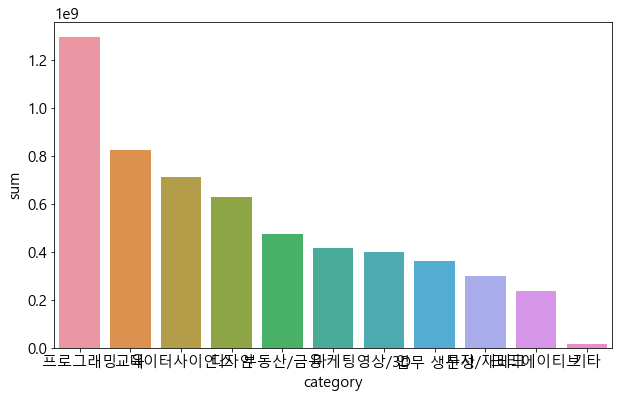

In [106]:
#1) 카테고리별 매출액 순위 

plt.figure(figsize = [10,6])
df2 = df2.sort_values('sum', ascending = False)
sns.barplot(data=df2, x='category',y = 'sum')

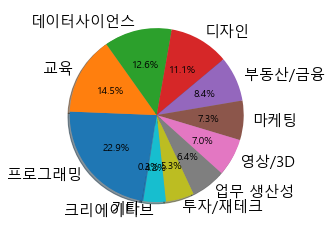

In [107]:
# 위에 대한 근거자료 // 전체 매출에서 각 카테고리의 비중

plt.pie(df2['sum'], labels = df2['category'], autopct='%.1f%%', startangle = 260,
       counterclock = False, shadow = True)
plt.show()

<AxesSubplot:>

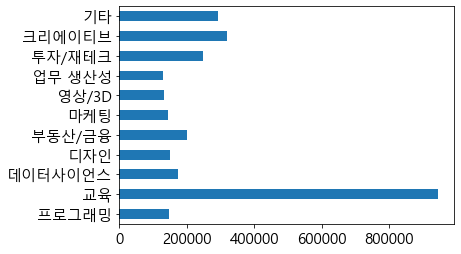

In [108]:
# 카테고리별 수량 대비 매출액

df2['perSale'] = df2['sum'] / df2['count']
df2['perSale'].plot(kind = 'barh', y = 'category')

In [109]:
# 카테고리별 환불 비율 비교

df2['Refund_rate'] = df2['Refund'] / df2['sum'] *100
df2['Refund_rate']

프로그래밍     16.20
교육         0.19
데이터사이언스   13.10
디자인       10.54
부동산/금융     5.98
마케팅       18.35
영상/3D     11.77
업무 생산성    11.55
투자/재테크     9.00
크리에이티브    15.84
기타         8.07
Name: Refund_rate, dtype: float64

<AxesSubplot:xlabel='category', ylabel='Refund_rate'>

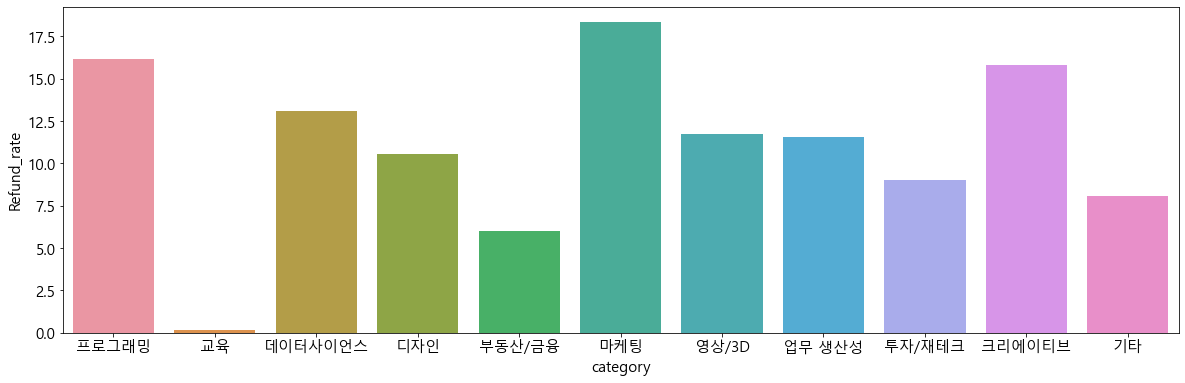

In [110]:
# => 환불 비율이 높은 마케팅과 크리에이티브, 또한 환불 총액이 높은 프로그래밍과 데이터사이언스에 대해
#    환불을 줄일 만한 대책이 필요

plt.figure(figsize = [20,6])
df2 = df2.sort_values('sum', ascending = False)
sns.barplot(data=df2, x='category',y = 'Refund_rate')

C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48141 (\N{HANGUL SYLLABLE MING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-pac

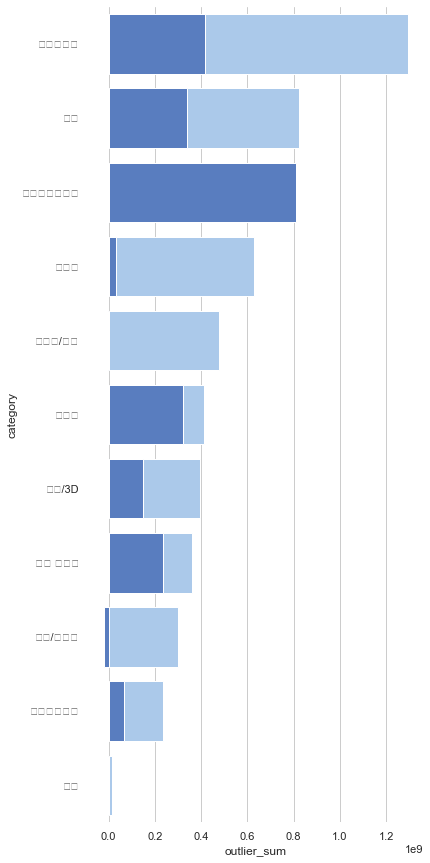

In [111]:
#3) Turkey Fence 방식을 사용한 아웃라이어 비중

sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="sum", y="category", data=df2,
            label="category", color="b")
sns.set_color_codes("muted")
sns.barplot(x="outlier_sum", y="category", data=df2,
            label="category", color="b")

#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# 기존의 아웃라이어를 소각하는 

## 그래서 이런것들을 어떻게 마케팅해서 살릴것이냐? -> 일전에 생각한 방법으로는 올인원 강의로 묶어서 팔 수 있지 않을까? 또는 할인률을 높인다 등의 방법이 있을듯함

## 반대의 상황. 잘 팔리고 있는 것들에 대해선? 이것 또한 강의 판매율이 높은 시간, 가격대에서 할인이나 광고를 추가적으로 하는 방법이 있을듯함

# 구매가 완료된 상품들의 월/요일/시간대별 분석

## 프로그래밍에서도 백엔드와 개발자 커리어, 프론트엔드가 많은 것을 알 수 있음.
### RED 강의는 DevOps가 가장 많음
- 백엔드 개발쪽에서는 RED 강의가 상대적으로 부족함


## 어느 고객군에서 구매가 가장 많이 이루어졌는가?

- 영상/3D 같은 경우 영상 편집의 환불이 주를 이루고 있음.( 강의의 질을 올려야 할듯)
- 대체적으로 올인원이 가장 많은 것을 확인할 수 있음
